In [1]:
import dataset_loader
import matplotlib.pyplot as plt
import midi
import numpy as np
import similarity

In [2]:
DATASET_ROOT="../../sabana/dataset/asap-dataset"

SLICE_DURATION = 5 # sec
EXPANSION_RATE = 1.5
FRAME_PER_SECOND = 20 # Hz
NUM_SAMPLES = 1
SETTLING_FRAME = 5
COMPENSATION_FRAME = 0

In [3]:
gen = dataset_loader.spawn(dataset_root=DATASET_ROOT, 
                           slice_duration=SLICE_DURATION,
                           expansion_rate=EXPANSION_RATE,
                           frame_per_second=FRAME_PER_SECOND,
                           shuffle=True)

In [4]:
score, perf, (head, tail) = gen.__next__()

In [5]:
def plot_midi_matrix(matrix: np.ndarray, title: str, head: int = None, tail: int = None):
    plt.figure(figsize=(16, 3))
    plt.title(title)
    plt.imshow(matrix, cmap="gray", aspect="auto", origin="lower", interpolation="nearest")
    if head:
        plt.plot([head, head], [0, 128])
    if tail:
        plt.plot([tail, tail], [0, 128])
    plt.ylabel("MIDI Key")
    plt.xlabel("Frame")
    plt.show()
    plt.clf()

In [6]:
def process_midi_matrix(midi_matrix, settling_frame):
    prev_pressed = [False] * midi.NUM_MIDI_KEYS
    midi_matrix = np.reshape(midi_matrix, [midi.NUM_MIDI_KEYS, -1]).T
    for frame_idx in range(len(midi_matrix)):
        for midi_key in range(midi.NUM_MIDI_KEYS):
            velocity = 0
            if midi_matrix[frame_idx, midi_key] <= 0:
                prev_pressed[midi_key] = False
            elif frame_idx > 0:
                prev_velocity = midi_matrix[frame_idx - 1, midi_key]
                if prev_velocity > 0:
                    velocity = prev_velocity - 1
                elif not prev_pressed[midi_key]:
                    velocity = settling_frame - 1
                prev_pressed[midi_key] = True
            else:
                velocity = settling_frame - 1
                prev_pressed[midi_key] = True
            midi_matrix[frame_idx, midi_key] = velocity
    return midi_matrix

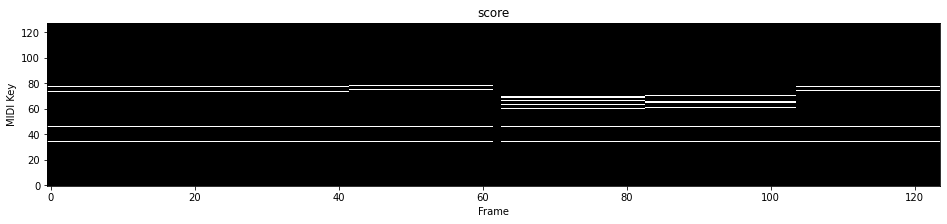

<Figure size 432x288 with 0 Axes>

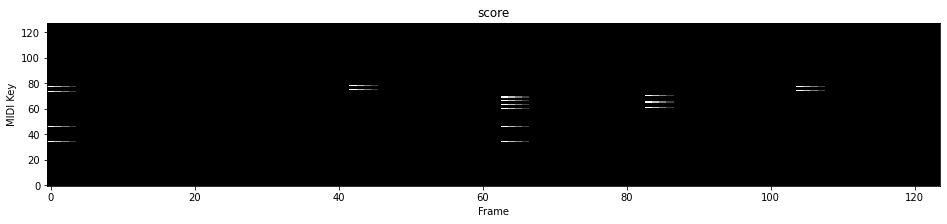

<Figure size 432x288 with 0 Axes>

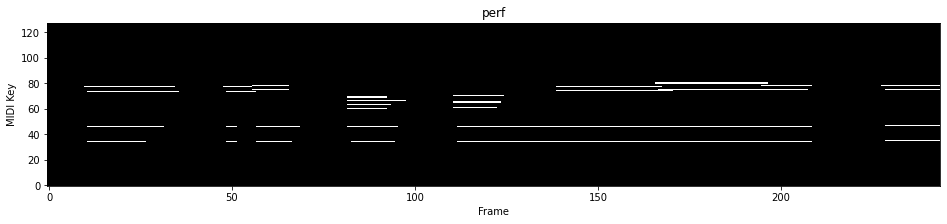

<Figure size 432x288 with 0 Axes>

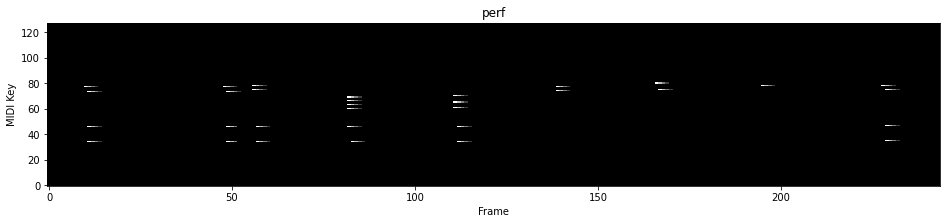

<Figure size 432x288 with 0 Axes>

In [7]:
plot_midi_matrix(score, "score")
score_ = process_midi_matrix(score,SETTLING_FRAME).T
plot_midi_matrix(score_, "score")

plot_midi_matrix(perf, "perf")
perf_ = process_midi_matrix(perf,SETTLING_FRAME).T
plot_midi_matrix(perf_, "perf")

In [8]:
score__ = midi.MIDIUnitSequenceList.from_midi_matrix(score,SETTLING_FRAME)
perf__ = midi.MIDIUnitSequenceList.from_midi_matrix(perf,SETTLING_FRAME)

In [9]:
score_sequence = score__.to_representative_unit_sequence()
perf_sequence = perf__.to_representative_unit_sequence()

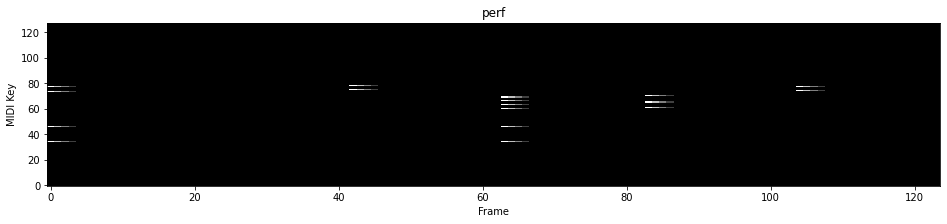

[[Note(34, 4.0000), Note(46, 4.0000), Note(73, 4.0000), Note(77, 4.0000)], [Note(34, 3.0000), Note(46, 3.0000), Note(73, 3.0000), Note(77, 3.0000)], [Note(34, 2.0000), Note(46, 2.0000), Note(73, 2.0000), Note(77, 2.0000)], [Note(34, 1.0000), Note(46, 1.0000), Note(73, 1.0000), Note(77, 1.0000)], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Note(75, 4.0000), Note(78, 4.0000)], [Note(75, 3.0000), Note(78, 3.0000)], [Note(75, 2.0000), Note(78, 2.0000)], [Note(75, 1.0000), Note(78, 1.0000)], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Note(34, 4.0000), Note(46, 4.0000), Note(60, 4.0000), Note(63, 4.0000), Note(66, 4.0000), Note(69, 4.0000)], [

<Figure size 432x288 with 0 Axes>

In [15]:
plot_midi_matrix(score_, "perf")
print(score__)
print()
print(score_sequence)

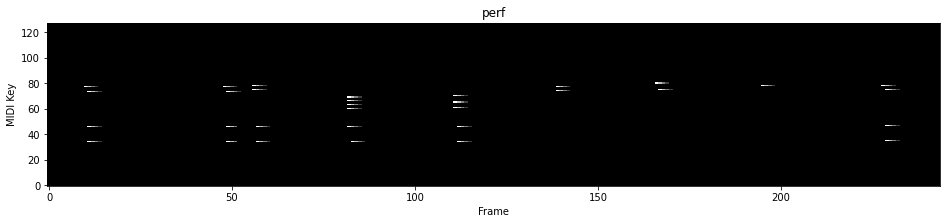

[[Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Note(77, 4.0000)], [Note(34, 4.0000), Note(46, 4.0000), Note(73, 4.0000), Note(77, 3.0000)], [Note(34, 3.0000), Note(46, 3.0000), Note(73, 3.0000), Note(77, 2.0000)], [Note(34, 2.0000), Note(46, 2.0000), Note(73, 2.0000), Note(77, 1.0000)], [Note(34, 1.0000), Note(46, 1.0000), Note(73, 1.0000)], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Rest], [Note(77, 4.0000)], [Note(34, 4.0000), Note(46, 4.0000), Note(73, 4.0000), Note(77, 3.0000)], [Note(34, 3.0000), Note(46, 3.0000), Note(73, 3.0000), Note(77, 2.0000)], [Note(34, 2.0000), Note(46, 2.0000), Note(73, 2.0000), Note(77, 1.0000)], [Note(73, 1.0000)], [Rest], [Rest], [Rest], [Note(75, 4.0000), Note(78, 4.0000)], [Note(34, 4.0000), Note(46, 4.000

<Figure size 432x288 with 0 Axes>

In [16]:
plot_midi_matrix(perf_, "perf")
print(perf__)
print()
print(perf_sequence)